<a href="https://colab.research.google.com/github/CD-AC/DataEnginner-Leagues_Snowflake/blob/main/Football_leagues_Snowflake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

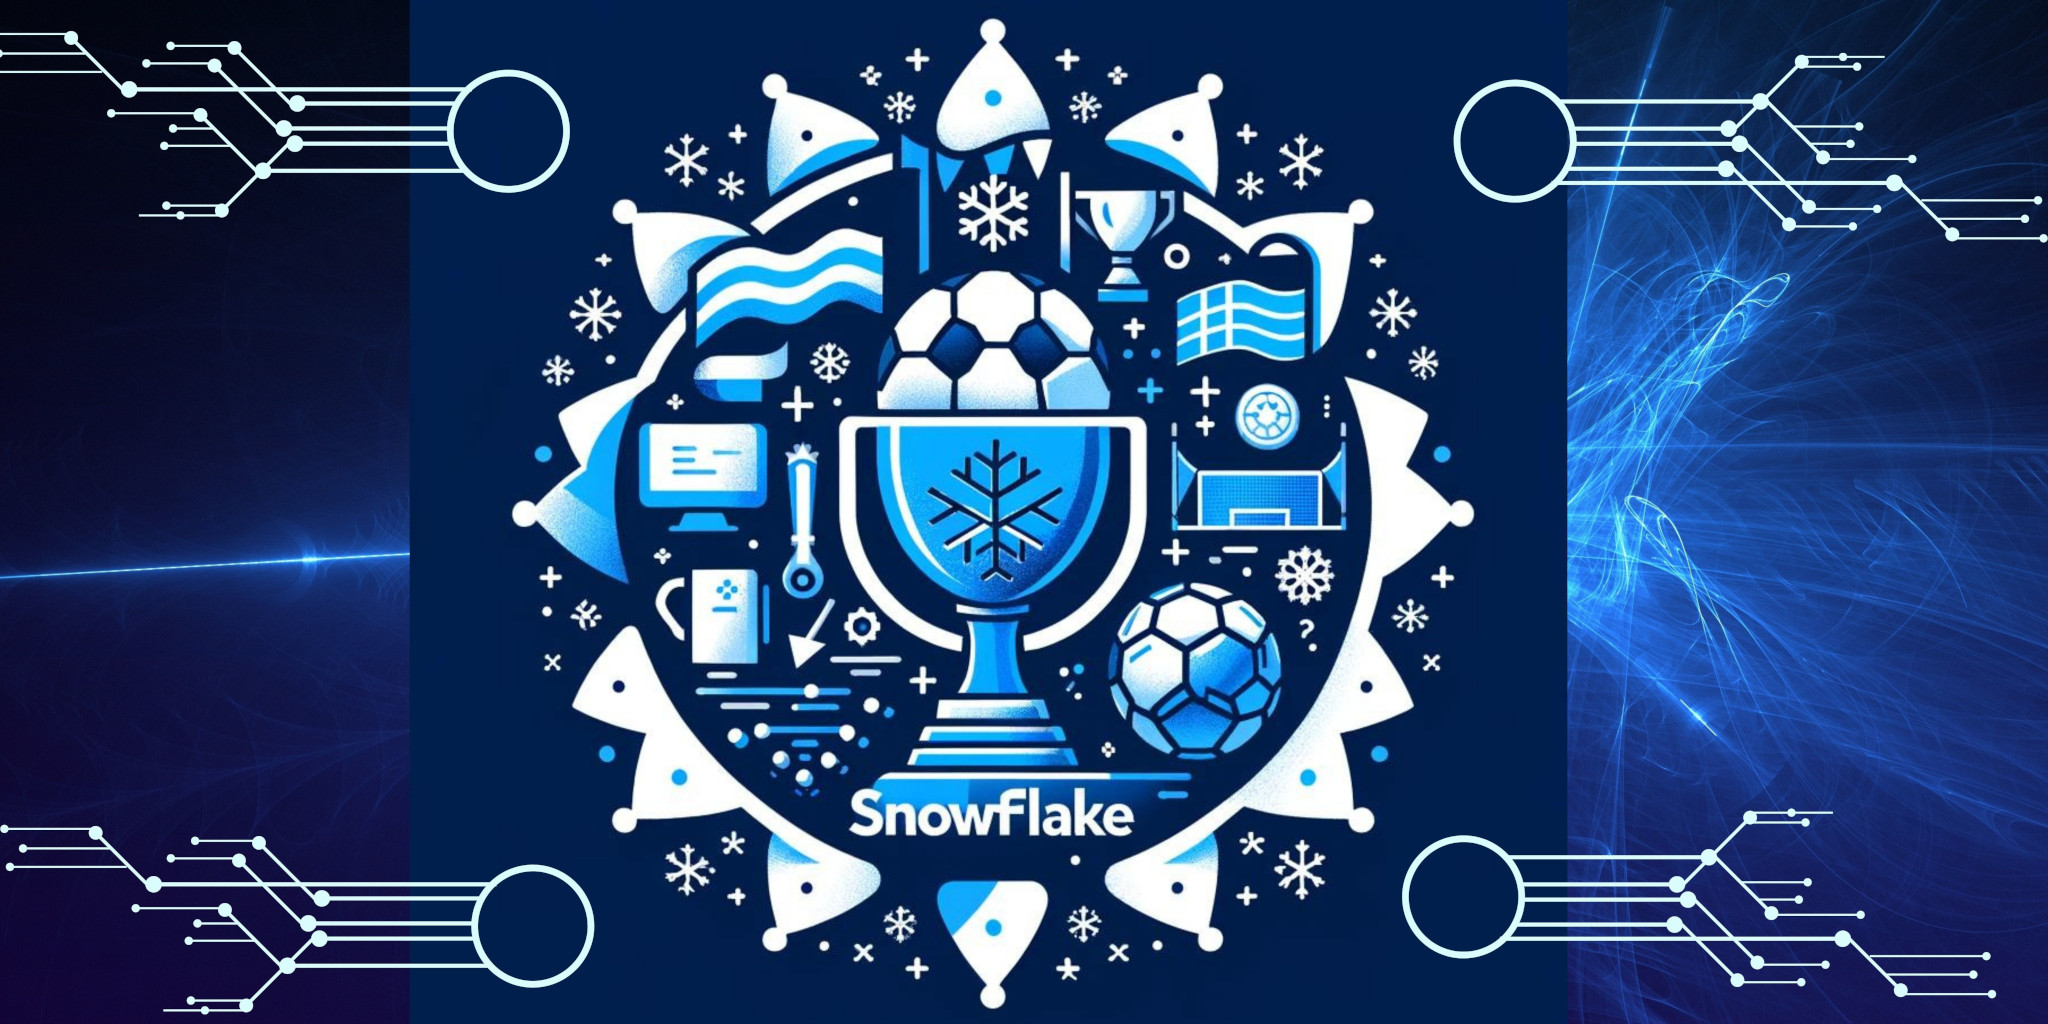

# Import Dependencies

In [2]:
import pandas as pd
import time
import random
import os
from utils import get_data,data_processing
from datetime import datetime
import uuid

# Create Dataframe

In [3]:
url = ['https://www.espn.com.co/futbol/posiciones/_/liga/esp.1',
      'https://www.espn.com.co/futbol/posiciones/_/liga/eng.1',
      'https://www.espn.com.co/futbol/posiciones/_/liga/ita.1',
      'https://www.espn.com.co/futbol/posiciones/_/liga/ger.1',
      'https://www.espn.com.co/futbol/posiciones/_/liga/fra.1',
      'https://www.espn.com.co/futbol/posiciones/_/liga/por.1',
      'https://www.espn.com.co/futbol/posiciones/_/liga/ned.1']
ligas = ['ESPAÑA','INGLATERRA','ITALIA','GERMANY','FRANCIA','PORTUGAL','HOLANDA']

df_ligas = {
    'LIGA':ligas,
    'URL':url
}

df_ligas = pd.DataFrame(df_ligas)
df_ligas

,LIGA,URL
0,ESPAÑA,https://www.espn.com.co/futbol/posiciones/_/li...
1,INGLATERRA,https://www.espn.com.co/futbol/posiciones/_/li...
2,ITALIA,https://www.espn.com.co/futbol/posiciones/_/li...
3,GERMANY,https://www.espn.com.co/futbol/posiciones/_/li...
4,FRANCIA,https://www.espn.com.co/futbol/posiciones/_/li...
5,PORTUGAL,https://www.espn.com.co/futbol/posiciones/_/li...
6,HOLANDA,https://www.espn.com.co/futbol/posiciones/_/li...


In [4]:
df_ligas['URL'][1]

'https://www.espn.com.co/futbol/posiciones/_/liga/eng.1'

# Create Tables Leagues

In [5]:
df = pd.read_html(df_ligas['URL'][1])

In [6]:
len(df)

2

In [7]:
df[0]

,2023/2024
0,1LIVLiverpool
1,2MCIManchester City
2,3ARSArsenal
3,4AVLAston Villa
4,5TOTTottenham Hotspur
5,6MUNManchester United
6,7WHUWest Ham United
7,8NEWNewcastle United
8,9BHABrighton & Hove Albion
9,10WOLWolverhampton Wanderers


In [8]:
df[1]

,J,G,E,P,GF,GC,DIF,PTS
0,27,19,6,2,64,25,39,63
1,27,19,5,3,62,27,35,62
2,27,19,4,4,68,23,45,61
3,27,17,4,6,59,37,22,55
4,26,15,5,6,55,39,16,50
5,27,14,2,11,37,39,-2,44
6,27,12,6,9,43,47,-4,42
7,27,12,4,11,57,45,12,40
8,27,10,9,8,49,44,5,39
9,27,11,5,11,40,43,-3,38


# Join Tables Leagues

In [9]:
df=pd.concat([df[0],df[1]],ignore_index=True,axis=1)
df

,0,1,2,3,4,5,6,7,8
0,1LIVLiverpool,27,19,6,2,64,25,39,63
1,2MCIManchester City,27,19,5,3,62,27,35,62
2,3ARSArsenal,27,19,4,4,68,23,45,61
3,4AVLAston Villa,27,17,4,6,59,37,22,55
4,5TOTTottenham Hotspur,26,15,5,6,55,39,16,50
5,6MUNManchester United,27,14,2,11,37,39,-2,44
6,7WHUWest Ham United,27,12,6,9,43,47,-4,42
7,8NEWNewcastle United,27,12,4,11,57,45,12,40
8,9BHABrighton & Hove Albion,27,10,9,8,49,44,5,39
9,10WOLWolverhampton Wanderers,27,11,5,11,40,43,-3,38


# Dataframe cleaning

In [10]:
df=df.rename(columns={0:'EQUIPO',1:'J', 2:'G', 3:'E', 4:'P', 5:'GF', 6:'GC', 7:'DIF', 8:'PTS'})
df['EQUIPO']=df['EQUIPO'].apply(lambda x: x[5:] if x[:2].isnumeric()==True else x[4:])
df['LIGA'] = df_ligas['LIGA'][1]

In [12]:
df

,EQUIPO,J,G,E,P,GF,GC,DIF,PTS,LIGA
0,Liverpool,27,19,6,2,64,25,39,63,INGLATERRA
1,Manchester City,27,19,5,3,62,27,35,62,INGLATERRA
2,Arsenal,27,19,4,4,68,23,45,61,INGLATERRA
3,Aston Villa,27,17,4,6,59,37,22,55,INGLATERRA
4,Tottenham Hotspur,26,15,5,6,55,39,16,50,INGLATERRA
5,Manchester United,27,14,2,11,37,39,-2,44,INGLATERRA
6,West Ham United,27,12,6,9,43,47,-4,42,INGLATERRA
7,Newcastle United,27,12,4,11,57,45,12,40,INGLATERRA
8,Brighton & Hove Albion,27,10,9,8,49,44,5,39,INGLATERRA
9,Wolverhampton Wanderers,27,11,5,11,40,43,-3,38,INGLATERRA
